In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('channel_stats.csv')

In [3]:
df.shape

(5979, 11)

In [4]:
df[['channel_name', 'video_title', 'view_count', 'like_count', 'commentCount']].head(5)

,channel_name,video_title,view_count,like_count,commentCount
0,Aakash Gupta,Which Paan? | Aakash Gupta | #shorts #comedysh...,392658,56185,189
1,Aakash Gupta,Delhi Boys I Aakash Gupta | #Shorts,454505,56850,143
2,Aakash Gupta,Watch Couple Goals season 3 on Amazon Mini TV ...,199512,17059,93
3,Aakash Gupta,Paan | Stand-up Comedy by Aakash Gupta,9028403,863721,7769
4,Aakash Gupta,Couple Goals Trailer | Aakash Gupta | Watch No...,541338,28787,572


In [5]:
# adding year, month columns from publishedAt column
df['publishedAt'] = pd.to_datetime(df.publishedAt)
df.loc[:, 'year'] = df['publishedAt'].dt.year
df.loc[:, 'month'] = df['publishedAt'].dt.month

Text(0, 0.5, 'Videos posted on YouTube')

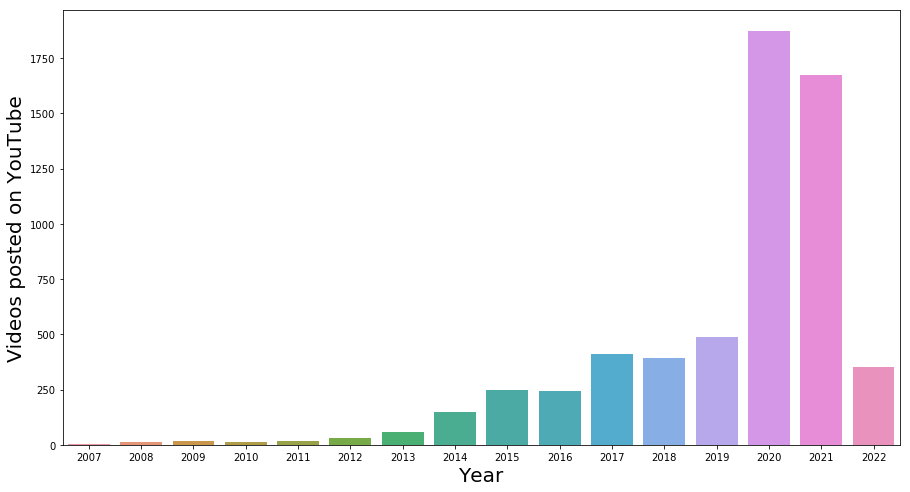

In [6]:
# number of videos posted on youtube per year
plt.figure(figsize=(15,8))
year_wise_video_count = sns.countplot(x='year', data=df)
year_wise_video_count.set_xlabel('Year', fontsize=20)
year_wise_video_count.set_ylabel('Videos posted on YouTube', fontsize=20)

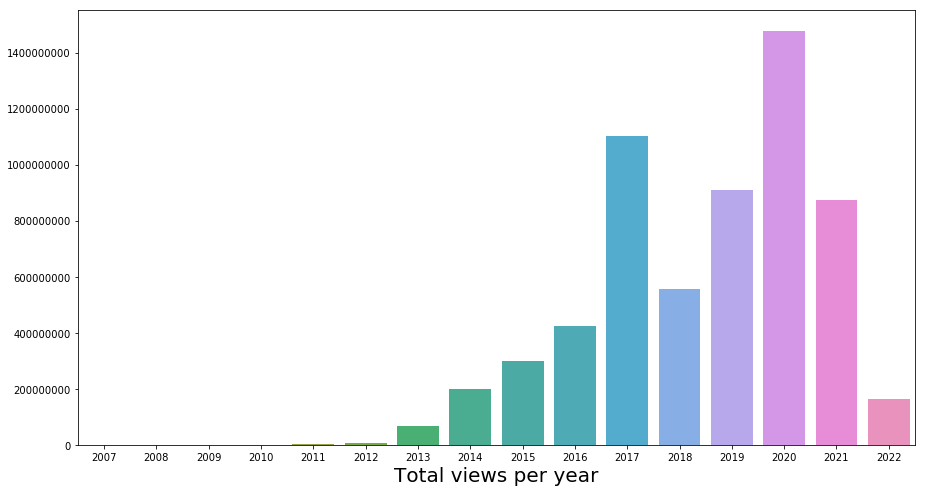

In [7]:
#total number of views per year
result = df.groupby('year')['view_count'].agg('sum').reset_index().sort_values('view_count')
# number of videos posted on youtube comedian wise count
plt.figure(figsize=(15,8))
plot = sns.barplot(x='year', 
                   y='view_count', 
                   data=result                  
                  )
plot.set_ylabel('', fontsize=0)
plot.set_xlabel('Total views per year', fontsize=20)
plot.ticklabel_format(style='plain', axis='y', useOffset=False)

Text(0.5, 0, 'Number of videos posted on YouTube')

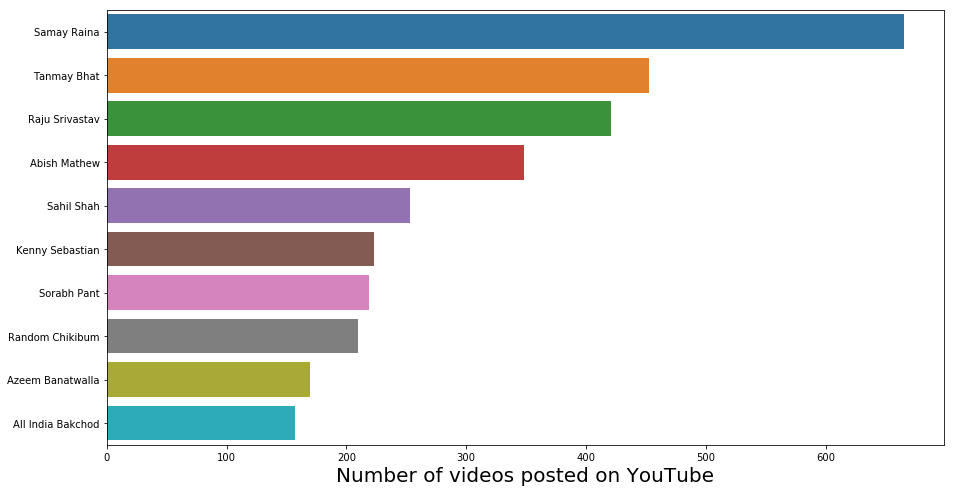

In [8]:
# count of videos posted on youtube per channel
result = df.groupby('channel_name')['video_id'].agg('count').reset_index().sort_values('video_id')
plt.figure(figsize=(15,8))
plot = sns.barplot(x='video_id', 
                   y='channel_name', 
                   data=result.sort_values(by='video_id', ascending=False).head(10)
                  )
plot.set_ylabel('', fontsize=0)
plot.set_xlabel('Number of videos posted on YouTube', fontsize=20)

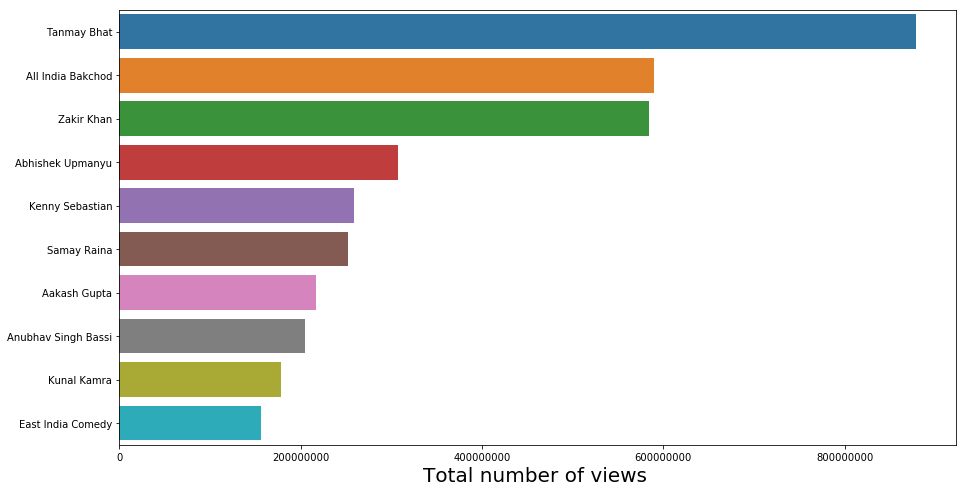

In [9]:
#top 10 channels by total number of views
total_number_views = df.groupby('channel_name')['view_count'].agg('sum').reset_index().sort_values('view_count')
plt.figure(figsize=(15,8))
plot = sns.barplot(x='view_count', 
            y='channel_name', 
            data=total_number_views.sort_values(by='view_count', ascending=False).head(10)
           )
plot.set_ylabel('', fontsize=20)
plot.set_xlabel('Total number of views ', fontsize=20)
plot.ticklabel_format(style='plain', axis='x', useOffset=False)

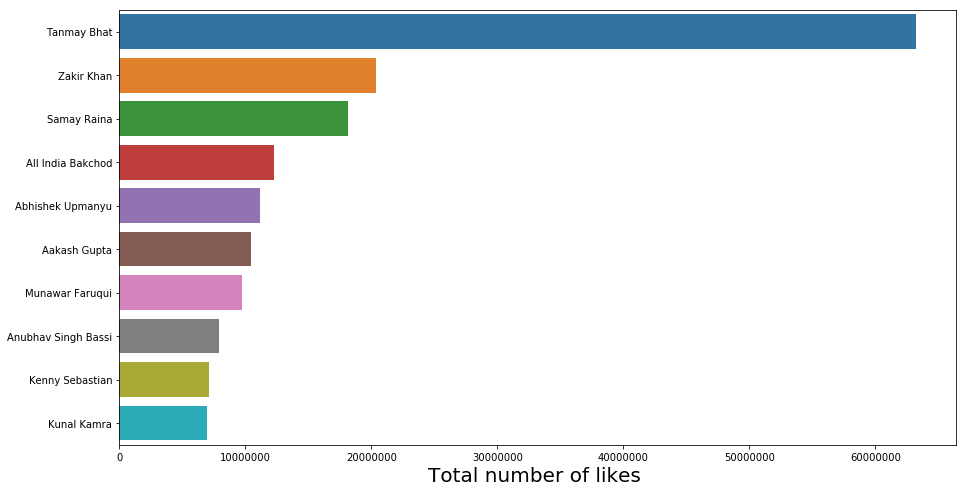

In [10]:
#top 10 channels by total number of likes
totat_likes = df.groupby('channel_name')['like_count'].agg('sum').reset_index().sort_values('like_count')
plt.figure(figsize=(15,8))
plot = sns.barplot(x='like_count', 
            y='channel_name', 
            data=totat_likes.sort_values(by='like_count', ascending=False).head(10)
           )
plot.set_ylabel('', fontsize=20)
plot.set_xlabel('Total number of likes ', fontsize=20)
plot.ticklabel_format(style='plain', axis='x',useOffset=False)

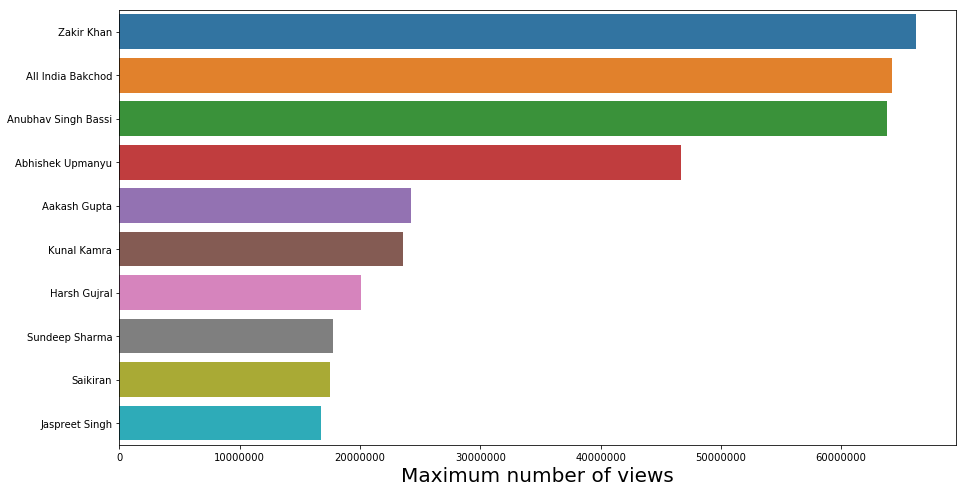

In [11]:
#top 10 channels having video with maximum views
max_count = df.groupby('channel_name')['view_count'].agg('max').reset_index().sort_values('view_count')
plt.figure(figsize=(15,8))
plot = sns.barplot(x='view_count', 
            y='channel_name', 
            data=max_count.sort_values(by='view_count', ascending=False).head(10)
           )
plot.set_ylabel('', fontsize=20)
plot.set_xlabel('Maximum number of views', fontsize=20)
plot.ticklabel_format(style='plain', axis='x',useOffset=False)

In [12]:
#top 10 videos by views
df_view = df[['channel_name', 'video_title', 'view_count']]
df_view.sort_values(by='view_count', ascending=False).reset_index(drop=True).head(10)

,channel_name,video_title,view_count
0,Zakir Khan,Zakir Khan - When I met a Delhi Girl | AIB Diwas,66252090
1,All India Bakchod,AIB : Udd Gaye by RITVIZ [Official Music Video...,64220041
2,Anubhav Singh Bassi,Cheating - Stand Up Comedy ft. Anubhav Singh B...,63796666
3,Anubhav Singh Bassi,Hostel - Stand Up Comedy ft. Anubhav Singh Bassi,56447068
4,Zakir Khan,Zakir Khan - What happens when you fail in an ...,46831715
5,Abhishek Upmanyu,"ABHISHEK UPMANYU |Friends, Crime, & The Cosmos...",46675552
6,Anubhav Singh Bassi,Roommate - Stand Up Comedy Ft. Anubhav Singh B...,46311795
7,Abhishek Upmanyu,"Delhi, Mumbai & Rich People | Stand-up Comedy ...",39442461
8,Anubhav Singh Bassi,Waxing - Stand Up Comedy ft. Anubhav Singh Bassi,38616483
9,Zakir Khan,Life Mein Chahiye Izzat | Zakir khan | Stand U...,33919071


In [13]:
#top 10 videos by likes
df_like = df[['channel_name', 'video_title', 'like_count']]
df_like.sort_values(by='like_count', ascending=False).reset_index(drop=True).head(10)

,channel_name,video_title,like_count
0,Anubhav Singh Bassi,Cheating - Stand Up Comedy ft. Anubhav Singh B...,2258837
1,Anubhav Singh Bassi,Roommate - Stand Up Comedy Ft. Anubhav Singh B...,2234260
2,Anubhav Singh Bassi,Hostel - Stand Up Comedy ft. Anubhav Singh Bassi,1941864
3,Zakir Khan,Zakir Khan - When I met a Delhi Girl | AIB Diwas,1744131
4,Anubhav Singh Bassi,Waxing - Stand Up Comedy ft. Anubhav Singh Bassi,1473570
5,Abhishek Upmanyu,"ABHISHEK UPMANYU |Friends, Crime, & The Cosmos...",1443078
6,Abhishek Upmanyu,Team Animals - Stand-Up Comedy by Abhishek Upm...,1429509
7,Aakash Gupta,Sarojini Nagar | Excuse Me Brother | Stand-Up ...,1288461
8,Abhishek Upmanyu,Marriage & Indian English | Stand-Up Comedy by...,1182588
9,Aakash Gupta,Dogs | Stand-Up Comedy by Aakash Gupta,1181615


In [14]:
# top 10 most commented videos
df_comments = df[['channel_name', 'video_title', 'commentCount']]
df_comments.sort_values(by='commentCount', ascending=False).reset_index(drop=True).head(10)

,channel_name,video_title,commentCount
0,Kunal Kamra,Aaja Beta Carry Teko Roast Sikhaye!,443641
1,Vir Das,Vir Das | I COME FROM TWO INDIAS,84740
2,Munawar Faruqui,Munawar Faruqui Leaving Comedy,64829
3,Kunal Kamra,KUNAL KAMRA | STAND UP COMEDY 2019,60912
4,Anubhav Singh Bassi,Roommate - Stand Up Comedy Ft. Anubhav Singh B...,52692
5,Munawar Faruqui,Ghost Story | Standup Comedy | Munawar Faruqui...,38882
6,Abhishek Upmanyu,Team Animals - Stand-Up Comedy by Abhishek Upm...,37904
7,Zakir Khan,Sab Sambhal Lete Hain Hum | Zakir Khan | poetry,34893
8,Munawar Faruqui,Politics in India - Part 2 | Stand-Up Comedy b...,34178
9,Munawar Faruqui,"Politics in India, Instagram & Sign boards | S...",33441


### Correlation

In [15]:
print(df.like_count.corr(df.view_count, method='pearson'), 
      df.like_count.corr(df.view_count, method='spearman'),
      df.like_count.corr(df.view_count, method='kendall'))

0.8956234408501051 0.9589473520178711 0.8293997957985313


In [16]:
print(df.view_count.corr(df.commentCount, method='pearson'), 
      df.view_count.corr(df.commentCount, method='spearman'),
      df.view_count.corr(df.commentCount, method='kendall'))

0.33145364999811805 0.8799857658160964 0.7042460186823056


In [17]:
print(df.like_count.corr(df.commentCount, method='pearson'), 
      df.like_count.corr(df.commentCount, method='spearman'),
      df.like_count.corr(df.commentCount, method='kendall'))

0.38738852751518077 0.9011952828342941 0.7373346866181415
